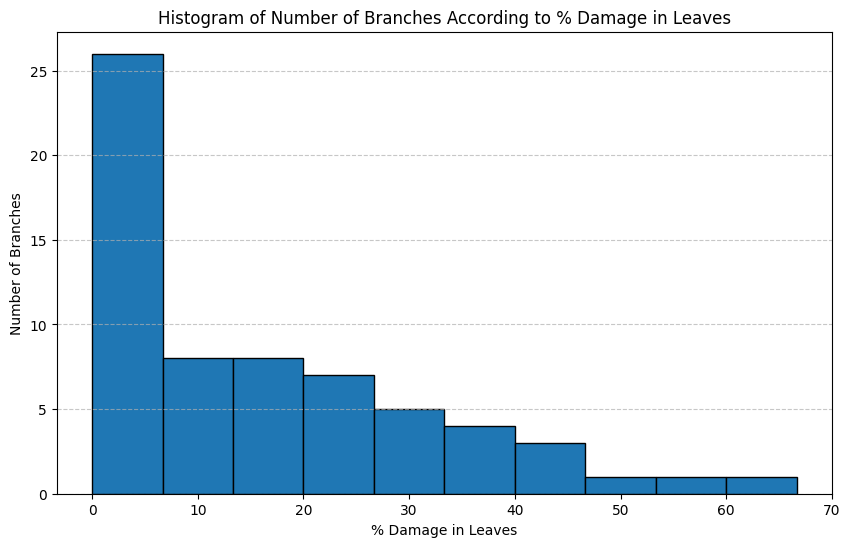

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read the data from the CSV file
data = pd.read_csv('raw_data.csv')

# Calculate the percentage of damaged leaves for each branch
data['Damage_Percentage'] = (data['Damaged_leaves'] / data['Total_leaves']) * 100

# Plot the histogram of the number of branches according to %damage in leaves
plt.figure(figsize=(10, 6))
plt.hist(data['Damage_Percentage'], bins=10, edgecolor='black')
plt.title('Histogram of Number of Branches According to % Damage in Leaves')
plt.xlabel('% Damage in Leaves')
plt.ylabel('Number of Branches')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [3]:
# Exclude branches with 0 ants
#data = data[data['Ant_number'] > 0].reset_index(drop=True)

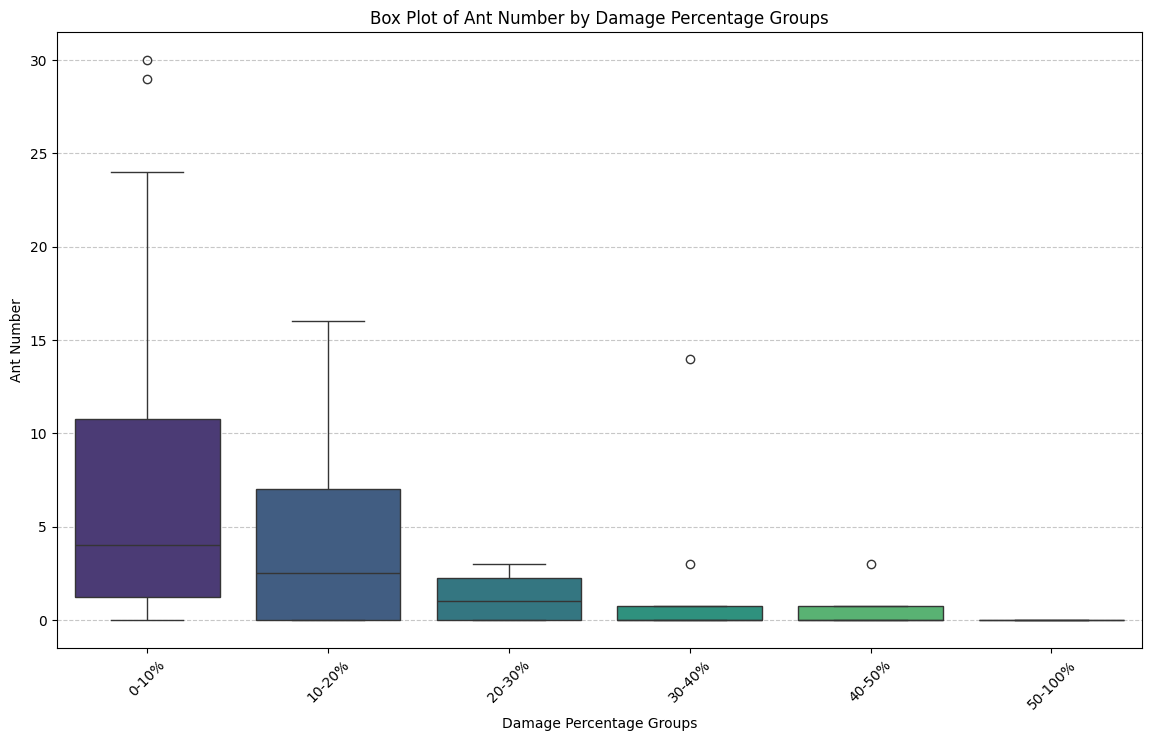

In [4]:
# Set custom intervals for Damage Percentage groups (modify this list as needed)
damage_bins = [0, 10, 20, 30, 40, 50, 100]  # Adjust the values here
damage_labels = [f'{damage_bins[i]}-{damage_bins[i+1]}%' for i in range(len(damage_bins) - 1)]

# Creating bins for Damage_Percentage with custom intervals
data['Damage_Group_Custom'] = pd.cut(data['Damage_Percentage'], bins=damage_bins, right=False, labels=damage_labels)

# Plotting the box plot of Ant Number by custom Damage Percentage Groups with a custom color palette
plt.figure(figsize=(14, 8))
sns.boxplot(x='Damage_Group_Custom', y='Ant_number', hue='Damage_Group_Custom', data=data, palette='viridis', width=0.8, dodge=False)  # Increase the width here
plt.title('Box Plot of Ant Number by Damage Percentage Groups')
plt.xlabel('Damage Percentage Groups')
plt.ylabel('Ant Number')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

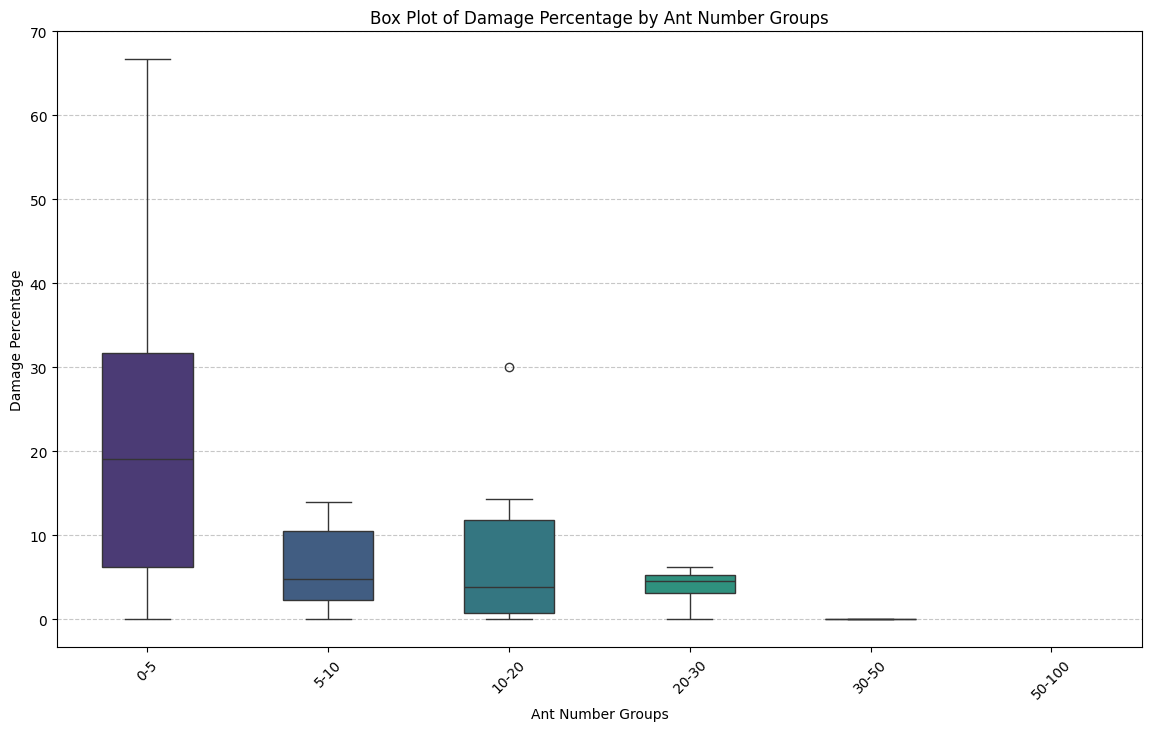

In [5]:
# Set custom intervals for Ant Number groups (modify this list as needed)
ant_bins = [0, 5, 10, 20, 30, 50, 100]  # Adjust the values here
ant_labels = [f'{ant_bins[i]}-{ant_bins[i+1]}' for i in range(len(ant_bins) - 1)]

# Creating bins for Ant_Number with custom intervals
data['Ant_Group_Custom'] = pd.cut(data['Ant_number'], bins=ant_bins, right=False, labels=ant_labels)

# Plotting the box plot of Damage Percentage by custom Ant Number Groups with a custom color palette
plt.figure(figsize=(14, 8))
sns.boxplot(x='Ant_Group_Custom', y='Damage_Percentage', hue='Ant_Group_Custom', data=data, palette='viridis', width=0.5, dodge=False)
plt.title('Box Plot of Damage Percentage by Ant Number Groups')
plt.xlabel('Ant Number Groups')
plt.ylabel('Damage Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

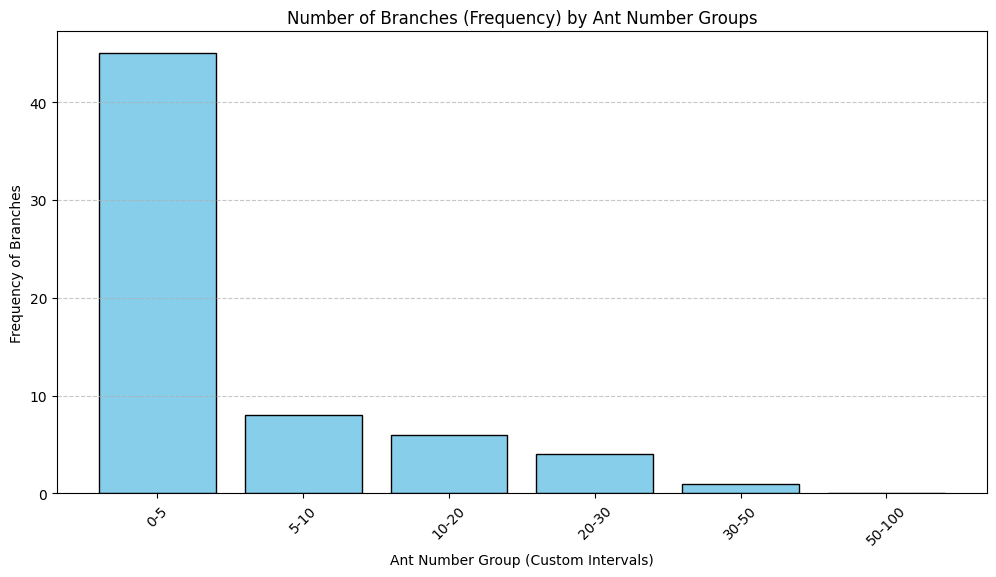

In [6]:
# Set custom intervals for Ant Number groups (adjust if needed)
ant_bins = [0, 5, 10, 20, 30, 50, 100]
ant_labels = [f'{ant_bins[i]}-{ant_bins[i+1]}' for i in range(len(ant_bins) - 1)]

# Creating bins for Ant_Number with custom intervals
data['Ant_Group_Custom'] = pd.cut(data['Ant_number'], bins=ant_bins, right=False, labels=ant_labels)

# Counting the frequency of branches in each Ant Number group
branch_counts = data['Ant_Group_Custom'].value_counts().reindex(ant_labels)  # Reindex to keep order consistent

# Plotting the bar chart for branch frequency by ant number group
plt.figure(figsize=(12, 6))
plt.bar(branch_counts.index, branch_counts.values, color='skyblue', edgecolor='black')
plt.title('Number of Branches (Frequency) by Ant Number Groups')
plt.xlabel('Ant Number Group (Custom Intervals)')
plt.ylabel('Frequency of Branches')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

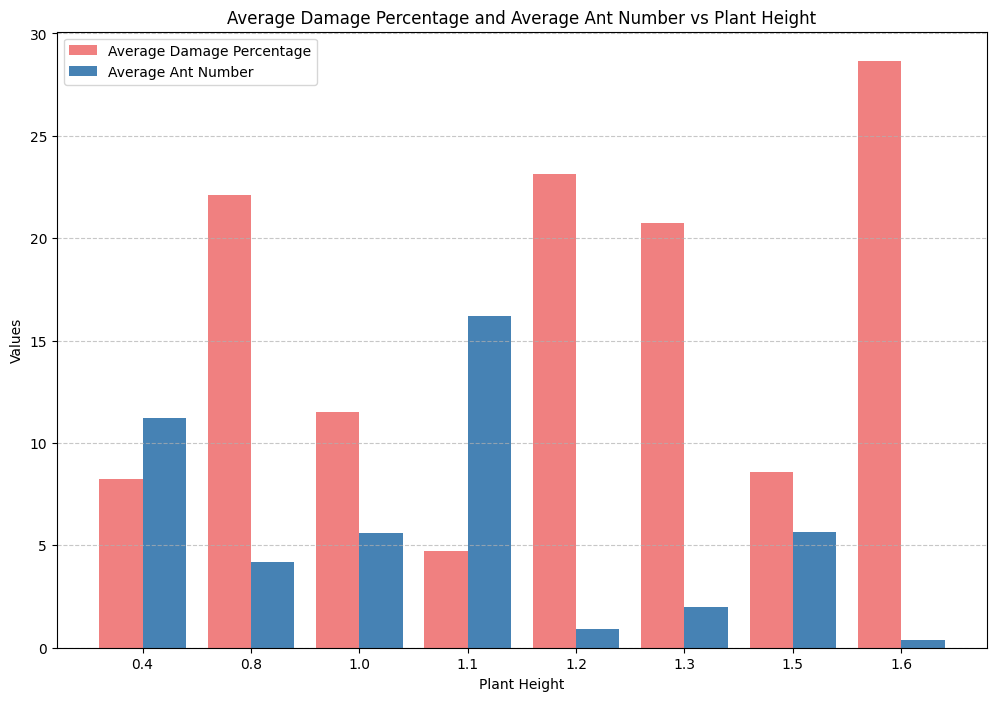

In [7]:
import numpy as np

# Grouping by 'Plant_hight(Krithiks)' and calculating averages for damage percentage and ant number
avg_damage_ant_by_height = data.groupby('Plant_hight(Krithiks)').agg(
    Average_Damage_Percentage=('Damage_Percentage', 'mean'),
    Average_Ant_Number=('Ant_number', 'mean')
).reset_index()

# Define the positions for the bars
positions = np.arange(len(avg_damage_ant_by_height))

# Bar width
bar_width = 0.4

# Plotting the results in a dual bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot for Average Damage Percentage
ax.bar(positions - bar_width/2, avg_damage_ant_by_height['Average_Damage_Percentage'], 
       color='lightcoral', label='Average Damage Percentage', width=bar_width)

# Bar plot for Average Ant Number
ax.bar(positions + bar_width/2, avg_damage_ant_by_height['Average_Ant_Number'], 
       color='steelblue', label='Average Ant Number', width=bar_width)

# Adding labels and title
ax.set_xlabel('Plant Height')
ax.set_ylabel('Values')
ax.set_title('Average Damage Percentage and Average Ant Number vs Plant Height')
ax.set_xticks(positions)
ax.set_xticklabels(avg_damage_ant_by_height['Plant_hight(Krithiks)'])
ax.legend()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/bl/pby9mmt51jg7zxqhqrfpwdx00000gn/T/ipykernel_5069/1472564716.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_damage_by_ant_group = data.groupby('Ant_Group_Custom')['Damage_Percentage'].mean().reindex(ant_labels)


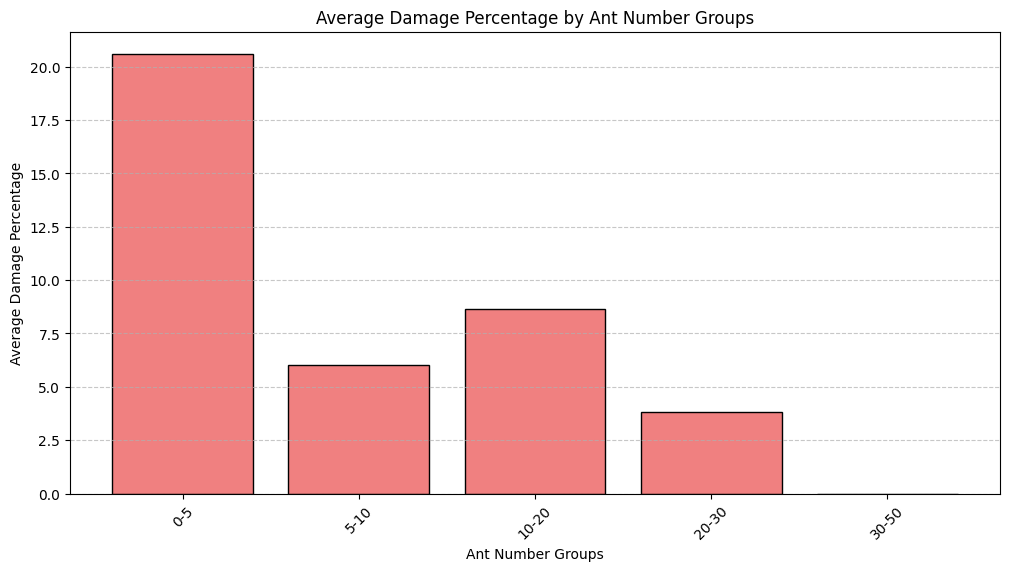

In [8]:
# Calculate the average damage percentage for each ant number group
avg_damage_by_ant_group = data.groupby('Ant_Group_Custom')['Damage_Percentage'].mean().reindex(ant_labels)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(avg_damage_by_ant_group.index, avg_damage_by_ant_group.values, color='lightcoral', edgecolor='black')
plt.title('Average Damage Percentage by Ant Number Groups')
plt.xlabel('Ant Number Groups')
plt.ylabel('Average Damage Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/var/folders/bl/pby9mmt51jg7zxqhqrfpwdx00000gn/T/ipykernel_5069/645129472.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Ant_Group_Custom', y='Damage_Percentage', data=data, jitter=True, palette='viridis', size=8)


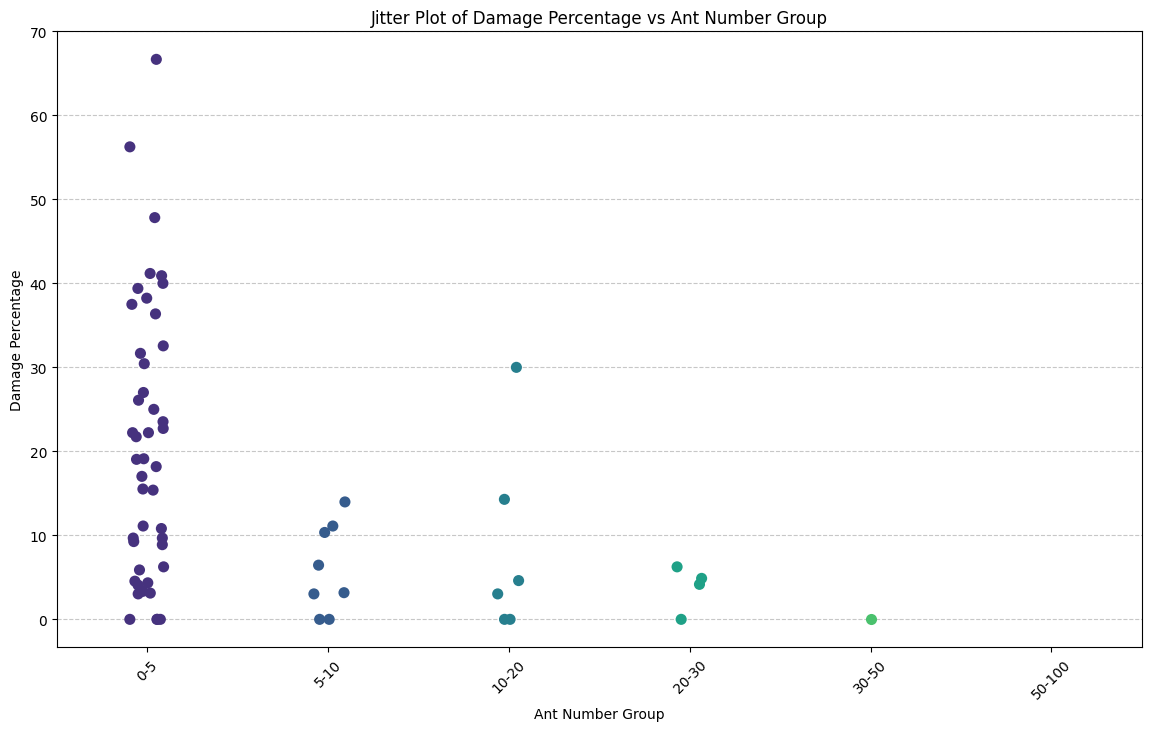

In [9]:
# Plotting the jitter plot of Damage Percentage vs Ant Number Group
plt.figure(figsize=(14, 8))
sns.stripplot(x='Ant_Group_Custom', y='Damage_Percentage', data=data, jitter=True, palette='viridis', size=8)
plt.title('Jitter Plot of Damage Percentage vs Ant Number Group')
plt.xlabel('Ant Number Group')
plt.ylabel('Damage Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

R-value (correlation coefficient): -0.77


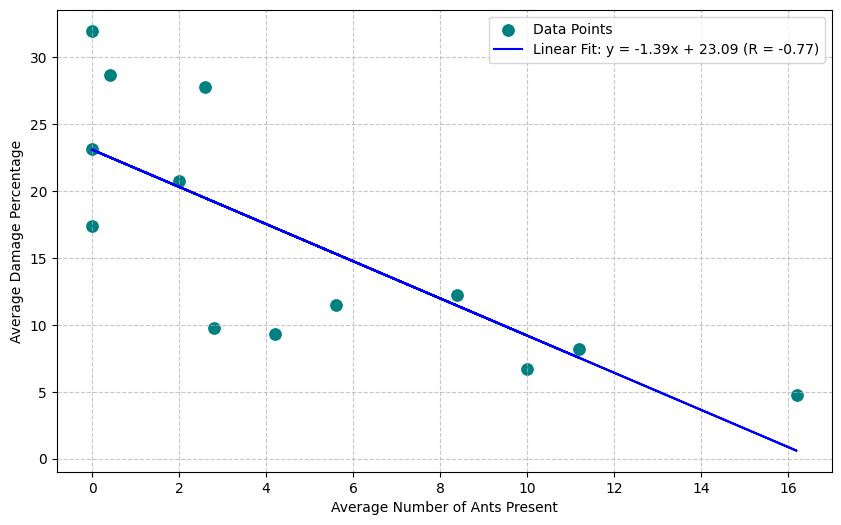

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming `data` DataFrame is already loaded with columns 'Plant_number', 'Total_leaves', 'Damaged_leaves', and 'Ant_number'

# Step 1: Calculate Damage Percentage for each branch
data['Damage_Percentage'] = (data['Damaged_leaves'] / data['Total_leaves']) * 100

# Step 2: Group by Plant to calculate averages for each plant
plant_averages = data.groupby('Plant_number').agg(
    Average_Total_Leaves=('Total_leaves', 'mean'),
    Average_Damaged_Leaves=('Damaged_leaves', 'mean'),
    Average_Ant_Number=('Ant_number', 'mean'),
    Average_Damage_Percentage=('Damage_Percentage', 'mean')
).reset_index()

# Step 3: Perform linear regression
x = plant_averages['Average_Ant_Number']
y = plant_averages['Average_Damage_Percentage']
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Calculate fitted line
fitted_y = slope * x + intercept

# Display the R-value
print(f"R-value (correlation coefficient): {r_value:.2f}")

# Step 4: Plot scatter plot with linear regression line
plt.figure(figsize=(10, 6))

# Scatter plot of Average Number of Ants vs. Average Damage Percentage
sns.scatterplot(
    x='Average_Ant_Number', 
    y='Average_Damage_Percentage', 
    data=plant_averages, 
    color='teal', 
    s=100, 
    label='Data Points'
)

# Plotting the linear regression line
plt.plot(x, fitted_y, color='blue', label=f'Linear Fit: y = {slope:.2f}x + {intercept:.2f} (R = {r_value:.2f})')

# Adding labels, title, and legend
plt.title('')
plt.xlabel('Average Number of Ants Present')
plt.ylabel('Average Damage Percentage')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()